**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academic Study_**: Continuous - Uniform Distribution

In [104]:
import random
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform
from scipy.integrate import quad

# Uniform Distribution

The uniform distribution is peculiar because its experiments take place under the premise that there is the same probability in every interval for which is defined, like [a,b]. Therefore, many statisticians say that it is a rectangular probability (image of probability in the density function). In any case, intervals of the same size will have the same probability of occurrence.

## Probability Density Function (PDF)

$$
    f(x) = 
    \begin{cases}
    \frac{1}{b-a} & \quad \text{when $a \leq x \leq b$}\\
    0 & \quad \text{otherwise}\\
    \end{cases}
$$

Where:

* x, a, b $\in \mathbb{R}$
* b-a $\neq$ 0

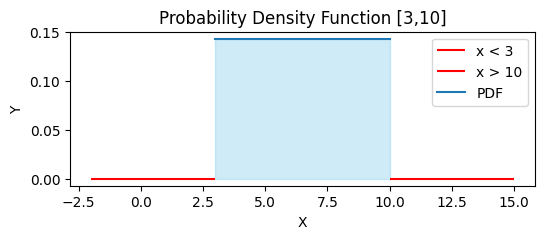

In [105]:
a = 3
b = 10
c = 1/(b-a)

x = np.linspace(a, b, (b-a)*10)
y = np.array([c for x in range((b-a)*10)])

# Criação do gráfico
plt.figure(figsize=(6,2))
plt.hlines(y=0, xmin=(a-5), xmax=a, color='red', label=f'x < {a}')
plt.hlines(y=0, xmin=b, xmax=(b+5), color='red', label=f'x > {b}')
plt.plot(x, y, label='PDF')
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Probability Density Function [{a},{b}]')
plt.legend()
plt.show()


If we calculate the integral between a and b, we will see that we have the total probability:

$$\int_{a}^{b} \frac{1}{b-a}\mathrm{d}x = 1$$

In [106]:
def pdf_uniform(x):
    return 1/(b-a)

In [107]:
integral, _ = quad(pdf_uniform, a, b)
print("Total probability: ", integral)

Total probability:  1.0


If we want to calculate the probability on an interval, we just specify it in the limits of integration.

In [108]:
x = 3
y = 7
integral, _ = quad(pdf_uniform, x, y)
print(f"P({x} <= x <= {y}) = ", integral)

P(3 <= x <= 7) =  0.5714285714285714


## Cumulative Distribution Function (CDF)

$$
    f(x) = 
    \begin{cases}
    0 & \quad text{x < a}\\
    \frac{x-a}{b-a} & \quad \text{when $a \leq x \leq b$}\\
    1 & \quad text{x > b}\\
    \end{cases}
$$

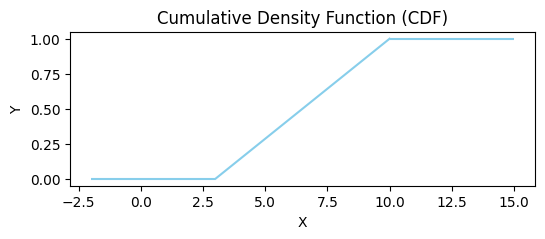

In [109]:
a = 3
b = 10
c = 1/(b-a)

x = np.linspace(a, b, (b-a)*10)
y = np.array([(number-a)/(b-a) for number in x])

# Criação do gráfico
plt.figure(figsize=(6,2))
plt.hlines(y=0, xmin=(a-5), xmax=a, color='skyblue', label=f'x < {a}')
plt.hlines(y=1, xmin=b, xmax=(b+5), color='skyblue', label=f'x > {b}')
plt.plot(x, y, color='skyblue', label='CDF')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Cumulative Density Function (CDF)')
plt.show()

## Expectation (E(X))

The expectation can be calculated using the following integral:

$$
E(X) = \int_{a}^{b}x\frac{1}{b-a}\mathrm{d}x\\
= \frac{1}{b-a}\frac{b^{2}-a^{2}}{2} \\
= \frac{(b-a)(a+b)}{2(b-a)}\\
= \frac{a+b}{2}
$$

So,

$$E(X) = \frac{a+b}{2}$$

In [110]:
def expectation_uniform(a,b):
    return (a+b)/2

In [111]:
a = 3
b = 10

distribution_uniform = uniform(loc=a, scale=b-a)
expectation = distribution_uniform.mean()

print("Expectation (Hard Coded): ", expectation_uniform(a,b))
print("Expectation (Scipy): ", expectation)

Expectation (Hard Coded):  6.5
Expectation (Scipy):  6.5


## Variance (Var(X))

On the other hand, variance is a little more complicated, but it can be simplified as follows:

$$
Var(X) = E( (X - E(X)^{2})) \\
= E( X^{2} - 2.X.E(X) + (E(X))^{2})\\
= E(X^{2}) - E(2.X.E(X)) + E((E(X))^{2})\\
= E(X^{2}) - 2.E(X).E(X) + (E(X))^{2}\\
= E(X^{2}) - (E(X))^{2}\\
= \int_{a}^{b}x^{2}\frac{1}{b-a}\mathrm{d}x - (\int_{a}^{b}x\frac{1}{b-a}\mathrm{d}x)^{2}\\
= \frac{b^{3} - a^{3}}{3(b-a)} - (\frac{1}{b-a}(\frac{b^{2}-a^{2}}{2}))^{2}\\
= \frac{b^{2}-ab+a^{2}}{3} - \frac{b^{2}+2ab+a^{2}}{4}\\
= \frac{b^{2}-2ab-a^{2}}{12}\\
= \frac{(b-a)^{2}}{12}
$$

So,

$$Var(X) = \frac{(b-a)^{2}}{12}$$

In [112]:
def variance_uniform(a,b):
    return (b-a)**2/12

In [113]:
variance = distribution_uniform.var()

print("Variance (Hard Coded): ", variance_uniform(a,b))
print("Variance (Scipy): ", variance)

Variance (Hard Coded):  4.083333333333333
Variance (Scipy):  4.083333333333333


## Standard Deviation (STD(X))

$$STD(X) = \sqrt{Var(X)}$$

In [114]:
def std_uniform(a,b):
    return variance_uniform(a,b)**(1/2)

In [115]:
std = distribution_uniform.std()

print("Standard Deviation (Hard Coded): ", std_uniform(a,b))
print("Standard Deviation (Scipy): ", std)

Standard Deviation (Hard Coded):  2.0207259421636903
Standard Deviation (Scipy):  2.0207259421636903
